## 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
### K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?

1. 데이터 가져오기
2. EDA 탐색적 데이터 분석 : 텍스트 분석, 시각화
3. 데이터 전처리 : 자료형 정리, 날짜 데이터 정리, 필요없는 데이터 제거(데이터 필터링)
4. 시각화 : 전체 상품군, 판매액에 대한 부분 -> 어느 국가에 얼마의 가격으로 판매가 되고 있는지(시계열 데이터 흐름도 파악 가능)
5. 데이터 집계: 대륙별, 국가별, 연도별 판매액 등

Step 1: 전반적 추세 확인 
목표: 판매전략 세울 국가 결정하기
Q1. 글로벌판매량(1) 국가별(2) / 화장품판매량 (1)연도별 / (2)분기별 증가하고 있는지, 감소하고 있는지
Q2. 국가마다 국가별 판매량에서 면세점/면세점이외가 차지하는 비율 (1)연도 기준(희망편) (2)분기별
Q3. 연도별로 화장품이 수출되고 있는 해외 국가가 증가했는지 / 감소했는지

Step 2: 특정 국가에 대한 판매전략 세우기
정하기

Q1. 전처리
-> '화장품' 카테고리만 뽑기
-> '연도' 칼럼

 Q1. 글로벌판매량(1) 국가별(2) / 화장품판매량 (1)연도별 / (2)분기별 증가하고 있는지, 감소하고 있는지

# 준비과정

In [1]:
# 필요한 라이브러리 import

import pandas as pd #데이터 불러오기
import numpy as np


In [2]:
# 데이터 가져오기, pd형태로 확인하기

df = pd.read_csv('../data/K-beautiful.csv',encoding='cp949')
df.head()

,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2021.1/4,2021.2/4,2021.3/4,2021.4/4,2022.1/4,2022.2/4,2022.3/4,2022.4/4,2023.1/4,2023.2/4 p)
0,중국,합계,계,55066.0,68938.0,77525.0,117223.0,170201.0,183801.0,173699.0,...,1009003,1014908,833575,730082,402616,347097,269352,189995,141933,309247
1,중국,합계,면세점,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,963384,964465,789774,675565,358933,292208,205569,145545,104133,272120
2,중국,합계,면세점 이외,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45619,50443,43801,54517,43683,54889,63783,44450,37800,37127
3,중국,컴퓨터 및 주변기기,계,32.0,34.0,65.0,68.0,80.0,50.0,77.0,...,46,49,49,52,19,26,28,99,58,67
4,중국,컴퓨터 및 주변기기,면세점,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


## 데이터 전처리

### 화장품 데이터만 뽑기 : 마스킹 연산 활용

In [3]:
# 1. 화장품 카테고리 중 총계만 뽑기
m = (df['상품군별'] == '화장품') & (df['판매유형별'] == '계')
df_beauty = df[m]
df_beauty

,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2021.1/4,2021.2/4,2021.3/4,2021.4/4,2022.1/4,2022.2/4,2022.3/4,2022.4/4,2023.1/4,2023.2/4 p)
27,중국,화장품,계,32235.0,43457.0,50509.0,77298.0,119497.0,129656.0,121078.0,...,958574,953499,782298,672670,317035,293141,208907,144590,104315,262027
72,일본,화장품,계,1034.0,781.0,646.0,939.0,874.0,1223.0,1671.0,...,12446,18775,23390,23077,26928,19231,21160,23081,25982,14275
117,아세안,화장품,계,398.0,397.0,383.0,527.0,1452.0,1255.0,882.0,...,2435,2240,3262,2795,3929,2944,5970,6271,6971,7158
162,중동,화장품,계,418.0,448.0,439.0,489.0,572.0,531.0,525.0,...,421,376,381,216,92,159,130,200,172,165
207,기타 아시아,화장품,계,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,-,-,-,-,-,-,57,90
252,미국,화장품,계,3740.0,3713.0,3399.0,4595.0,11223.0,6176.0,7061.0,...,11859,10504,8194,9963,6699,5571,6037,8426,8233,13805
297,캐나다,화장품,계,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,-,-,-,-,-,-,354,579
342,유럽연합+영국,화장품,계,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1449,1307,780,526,214,393,283,303,270,349
387,기타 유럽,화장품,계,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,-,-,-,-,-,-,223,283


In [4]:
# 데이터타입 확인하기 -> 2017년부터 object라 숫자로 바꿔줘야 함

df_beauty.info()
df_beauty.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 27 to 387
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   국가(대륙)별      9 non-null      object 
 1   상품군별         9 non-null      object 
 2   판매유형별        9 non-null      object 
 3   2014.1/4     5 non-null      float64
 4   2014.2/4     5 non-null      float64
 5   2014.3/4     5 non-null      float64
 6   2014.4/4     5 non-null      float64
 7   2015.1/4     5 non-null      float64
 8   2015.2/4     5 non-null      float64
 9   2015.3/4     5 non-null      float64
 10  2015.4/4     5 non-null      float64
 11  2016.1/4     5 non-null      float64
 12  2016.2/4     5 non-null      float64
 13  2016.3/4     5 non-null      float64
 14  2016.4/4     5 non-null      float64
 15  2017.1/4     9 non-null      object 
 16  2017.2/4     9 non-null      object 
 17  2017.3/4     9 non-null      object 
 18  2017.4/4     9 non-null      object 
 19  2018.1/4     9

,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2021.1/4,2021.2/4,2021.3/4,2021.4/4,2022.1/4,2022.2/4,2022.3/4,2022.4/4,2023.1/4,2023.2/4 p)
27,중국,화장품,계,32235.0,43457.0,50509.0,77298.0,119497.0,129656.0,121078.0,...,958574,953499,782298,672670,317035,293141,208907,144590,104315,262027
72,일본,화장품,계,1034.0,781.0,646.0,939.0,874.0,1223.0,1671.0,...,12446,18775,23390,23077,26928,19231,21160,23081,25982,14275
117,아세안,화장품,계,398.0,397.0,383.0,527.0,1452.0,1255.0,882.0,...,2435,2240,3262,2795,3929,2944,5970,6271,6971,7158
162,중동,화장품,계,418.0,448.0,439.0,489.0,572.0,531.0,525.0,...,421,376,381,216,92,159,130,200,172,165
207,기타 아시아,화장품,계,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,-,-,-,-,-,-,57,90


### object -> int 변환

In [5]:
# 변환하기 전에 값들 중에 이상한 거 뭐 있는지 확인 -> 2017에 하이픈이 포함되어 있음
print(df['2017.1/4'].unique())

['689563' '635589' '53974' '47' '3' '44' '8147' '7691' '456' '9' '0'
 '1405' '150' '5' '145' '1632' '58988' '31623' '27365' '1089' '603133'
 '589816' '13317' '2541' '282' '2259' '7284' '5916' '1368' '18' '4052'
 '71' '3981' '1068' '182' '886' '33447' '3880' '29567' '27' '699' '681'
 '2' '89' '537' '20440' '412' '20028' '5052' '3332' '1720' '52' '695'
 '118' '577' '1' '736' '4398' '35796' '15312' '20484' '316' '3430' '1189'
 '2241' '1012' '611' '1116' '6380' '612' '5768' '1571' '1569' '17878'
 '13316' '4562' '862' '431' '190' '241' '11' '1849' '326' '323' '1936'
 '95' '353' '23' '76' '209' '45' '575' '49' '7' '358' '141' '-' '46662'
 '8160' '38502' '1081' '2895' '2877' '68' '1969' '69' '1927' '14746' '98'
 '14648' '1481' '15522' '7971' '7551' '744' '394' '73' '321' '3107' '2658'
 '7897' '165' '7732' '962' '4' '958' '22' '841' '1049' '13' '1036' '179'
 '2506' '143' '2363' '25' '20' '733' '739']


##### 문자열처리

In [6]:
# 바꿀 대상 칼럼들 확인
df_beauty.columns[3:]

Index(['2014.1/4', '2014.2/4', '2014.3/4', '2014.4/4', '2015.1/4', '2015.2/4',
       '2015.3/4', '2015.4/4', '2016.1/4', '2016.2/4', '2016.3/4', '2016.4/4',
       '2017.1/4', '2017.2/4', '2017.3/4', '2017.4/4', '2018.1/4', '2018.2/4',
       '2018.3/4', '2018.4/4', '2019.1/4', '2019.2/4', '2019.3/4', '2019.4/4',
       '2020.1/4', '2020.2/4', '2020.3/4', '2020.4/4', '2021.1/4', '2021.2/4',
       '2021.3/4', '2021.4/4', '2022.1/4', '2022.2/4', '2022.3/4', '2022.4/4',
       '2023.1/4', '2023.2/4 p)'],
      dtype='object')

In [7]:
# 칼럼들 안에 섞여 있던 '-'을 0으로 대체하고(4행), 만약 Null 값이 있다면 0으로 처리(5행), 그 다음에 모든 칼럼들의 밸류를 정수형으로 바꾸기(6행)

for column in df_beauty.columns[3:]:
    df_beauty[column].replace("-",0,inplace=True)
    df_beauty[column].fillna(0,inplace=True)
    df_beauty[column] = df_beauty[column].astype('int')

/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_6281/1816523885.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beauty[column].replace("-",0,inplace=True)
/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_6281/1816523885.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beauty[column].fillna(0,inplace=True)
/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_6281/1816523885.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [8]:
# 정수형으로 변환 제대로 되었는지 확인

df_beauty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 27 to 387
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   국가(대륙)별      9 non-null      object
 1   상품군별         9 non-null      object
 2   판매유형별        9 non-null      object
 3   2014.1/4     9 non-null      int64 
 4   2014.2/4     9 non-null      int64 
 5   2014.3/4     9 non-null      int64 
 6   2014.4/4     9 non-null      int64 
 7   2015.1/4     9 non-null      int64 
 8   2015.2/4     9 non-null      int64 
 9   2015.3/4     9 non-null      int64 
 10  2015.4/4     9 non-null      int64 
 11  2016.1/4     9 non-null      int64 
 12  2016.2/4     9 non-null      int64 
 13  2016.3/4     9 non-null      int64 
 14  2016.4/4     9 non-null      int64 
 15  2017.1/4     9 non-null      int64 
 16  2017.2/4     9 non-null      int64 
 17  2017.3/4     9 non-null      int64 
 18  2017.4/4     9 non-null      int64 
 19  2018.1/4     9 non-null      int64 

#### to do: .applymap을 이용해서 위에 for문 대체하기

### 연도 칼럼 만들기

In [9]:
# # 연도 칼럼 만들기 _test : 연도 칼럼을 새로 만들어서 추가하는 방식
# df_beauty['test'] = df_beauty['2014.1/4'] + df_beauty['2014.2/4'] + df_beauty['2014.3/4'] + df_beauty['2014.4/4'] 
# df_beauty.head()

In [10]:
for i in range(2014,2023):
    df_beauty[i] = df_beauty[str(i)+'.1/4'] + df_beauty[str(i)+'.2/4'] + df_beauty[str(i)+'.3/4'] + df_beauty[str(i)+'.4/4']

df_beauty.head()

/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_6281/1478095919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beauty[i] = df_beauty[str(i)+'.1/4'] + df_beauty[str(i)+'.2/4'] + df_beauty[str(i)+'.3/4'] + df_beauty[str(i)+'.4/4']
/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_6281/1478095919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beauty[i] = df_beauty[str(i)+'.1/4'] + df_beauty[str(i)+'.2/4'] + df_beauty[str(i)+'.3/4'] + df_beauty[str(i)+'.4/4']
/var/folders/y6/

,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2023.2/4 p),2014,2015,2016,2017,2018,2019,2020,2021,2022
27,중국,화장품,계,32235,43457,50509,77298,119497,129656,121078,...,262027,203499,625774,1493237,2068310,2453172,4696641,4895355,3367041,963673
72,일본,화장품,계,1034,781,646,939,874,1223,1671,...,14275,3400,6600,11345,17297,18780,43689,61265,77688,90400
117,아세안,화장품,계,398,397,383,527,1452,1255,882,...,7158,1705,5065,10773,73966,90635,116421,35667,10732,19114
162,중동,화장품,계,418,448,439,489,572,531,525,...,165,1794,2312,2152,2333,2866,3399,2217,1394,581
207,기타 아시아,화장품,계,0,0,0,0,0,0,0,...,90,0,0,0,0,0,0,0,0,0


#### 연도별 데이터에서 필요한 데이터만 남기고 버리기

In [11]:
# df_beauty는 원본 데이터니까 새로운 데이터프레임으로 복사

df_yearly = df_beauty.copy()
df_yearly.head()


,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2023.2/4 p),2014,2015,2016,2017,2018,2019,2020,2021,2022
27,중국,화장품,계,32235,43457,50509,77298,119497,129656,121078,...,262027,203499,625774,1493237,2068310,2453172,4696641,4895355,3367041,963673
72,일본,화장품,계,1034,781,646,939,874,1223,1671,...,14275,3400,6600,11345,17297,18780,43689,61265,77688,90400
117,아세안,화장품,계,398,397,383,527,1452,1255,882,...,7158,1705,5065,10773,73966,90635,116421,35667,10732,19114
162,중동,화장품,계,418,448,439,489,572,531,525,...,165,1794,2312,2152,2333,2866,3399,2217,1394,581
207,기타 아시아,화장품,계,0,0,0,0,0,0,0,...,90,0,0,0,0,0,0,0,0,0


In [12]:
# 분기 데이터 버리고 연도별 총합만 남기기
for year in range (2014,2023):
    target1 = str(year)+'.1/4'
    target2 = str(year)+'.2/4'
    target3 = str(year)+'.3/4'
    target4 = str(year)+'.4/4'
 
    df_yearly.drop(target1,axis=1,inplace=True)
    df_yearly.drop(target2,axis=1,inplace=True)
    df_yearly.drop(target3,axis=1,inplace=True)
    df_yearly.drop(target4,axis=1,inplace=True)


df_yearly.drop('2023.1/4',axis=1,inplace=True)
df_yearly.drop('2023.2/4 p)',axis=1,inplace=True)
df_yearly.drop('판매유형별',axis=1,inplace=True)
df_yearly.drop('상품군별',axis=1,inplace=True)
df_yearly.head()

,국가(대륙)별,2014,2015,2016,2017,2018,2019,2020,2021,2022
27,중국,203499,625774,1493237,2068310,2453172,4696641,4895355,3367041,963673
72,일본,3400,6600,11345,17297,18780,43689,61265,77688,90400
117,아세안,1705,5065,10773,73966,90635,116421,35667,10732,19114
162,중동,1794,2312,2152,2333,2866,3399,2217,1394,581
207,기타 아시아,0,0,0,0,0,0,0,0,0


In [13]:
df_yearly.set_index('국가(대륙)별',inplace=True)
df_yearly = df_yearly.transpose()
df_yearly.head()

국가(대륙)별,중국,일본,아세안,중동,기타 아시아,미국,캐나다,유럽연합+영국,기타 유럽
2014,203499,3400,1705,1794,0,15447,0,0,0
2015,625774,6600,5065,2312,0,32951,0,0,0
2016,1493237,11345,10773,2152,0,45684,0,0,0
2017,2068310,17297,73966,2333,0,69374,0,9540,0
2018,2453172,18780,90635,2866,0,50583,0,11805,0


In [14]:
df_yearly

국가(대륙)별,중국,일본,아세안,중동,기타 아시아,미국,캐나다,유럽연합+영국,기타 유럽
2014,203499,3400,1705,1794,0,15447,0,0,0
2015,625774,6600,5065,2312,0,32951,0,0,0
2016,1493237,11345,10773,2152,0,45684,0,0,0
2017,2068310,17297,73966,2333,0,69374,0,9540,0
2018,2453172,18780,90635,2866,0,50583,0,11805,0
2019,4696641,43689,116421,3399,0,49620,0,12841,0
2020,4895355,61265,35667,2217,0,50509,0,8487,0
2021,3367041,77688,10732,1394,0,40520,0,4062,0
2022,963673,90400,19114,581,0,26733,0,1193,0


In [15]:
df_yearly.columns
df_yearly.index

Index([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='object')

In [16]:
year = []
for i in range(len(df_yearly.index)):
    year.append(int(df_yearly.index[i]))
year

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [17]:
df_yearly['year'] = year
df_yearly

국가(대륙)별,중국,일본,아세안,중동,기타 아시아,미국,캐나다,유럽연합+영국,기타 유럽,year
2014,203499,3400,1705,1794,0,15447,0,0,0,2014
2015,625774,6600,5065,2312,0,32951,0,0,0,2015
2016,1493237,11345,10773,2152,0,45684,0,0,0,2016
2017,2068310,17297,73966,2333,0,69374,0,9540,0,2017
2018,2453172,18780,90635,2866,0,50583,0,11805,0,2018
2019,4696641,43689,116421,3399,0,49620,0,12841,0,2019
2020,4895355,61265,35667,2217,0,50509,0,8487,0,2020
2021,3367041,77688,10732,1394,0,40520,0,4062,0,2021
2022,963673,90400,19114,581,0,26733,0,1193,0,2022


### 연도별 해외판매 총계 구하기

In [18]:
# 연도별 해외판매 총계 구하기
total_list = list(df_yearly.iloc[:, :].sum(axis=1,numeric_only=True))
total_list

[227859, 674717, 1565207, 2242837, 2629859, 4924630, 5055520, 3503458, 1103716]

In [19]:
df_yearly['globe_total'] = total_list
df_yearly

국가(대륙)별,중국,일본,아세안,중동,기타 아시아,미국,캐나다,유럽연합+영국,기타 유럽,year,globe_total
2014,203499,3400,1705,1794,0,15447,0,0,0,2014,227859
2015,625774,6600,5065,2312,0,32951,0,0,0,2015,674717
2016,1493237,11345,10773,2152,0,45684,0,0,0,2016,1565207
2017,2068310,17297,73966,2333,0,69374,0,9540,0,2017,2242837
2018,2453172,18780,90635,2866,0,50583,0,11805,0,2018,2629859
2019,4696641,43689,116421,3399,0,49620,0,12841,0,2019,4924630
2020,4895355,61265,35667,2217,0,50509,0,8487,0,2020,5055520
2021,3367041,77688,10732,1394,0,40520,0,4062,0,2021,3503458
2022,963673,90400,19114,581,0,26733,0,1193,0,2022,1103716


In [20]:
df_yearly.transpose()


,2014,2015,2016,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,,,,
중국,203499,625774,1493237,2068310,2453172,4696641,4895355,3367041,963673
일본,3400,6600,11345,17297,18780,43689,61265,77688,90400
아세안,1705,5065,10773,73966,90635,116421,35667,10732,19114
중동,1794,2312,2152,2333,2866,3399,2217,1394,581
기타 아시아,0,0,0,0,0,0,0,0,0
미국,15447,32951,45684,69374,50583,49620,50509,40520,26733
캐나다,0,0,0,0,0,0,0,0,0
유럽연합+영국,0,0,0,9540,11805,12841,8487,4062,1193
기타 유럽,0,0,0,0,0,0,0,0,0


In [21]:
# 여차하면 지울 열
df_yearly.set_index('year',inplace=True)
df_yearly

국가(대륙)별,중국,일본,아세안,중동,기타 아시아,미국,캐나다,유럽연합+영국,기타 유럽,globe_total
year,,,,,,,,,,
2014,203499,3400,1705,1794,0,15447,0,0,0,227859
2015,625774,6600,5065,2312,0,32951,0,0,0,674717
2016,1493237,11345,10773,2152,0,45684,0,0,0,1565207
2017,2068310,17297,73966,2333,0,69374,0,9540,0,2242837
2018,2453172,18780,90635,2866,0,50583,0,11805,0,2629859
2019,4696641,43689,116421,3399,0,49620,0,12841,0,4924630
2020,4895355,61265,35667,2217,0,50509,0,8487,0,5055520
2021,3367041,77688,10732,1394,0,40520,0,4062,0,3503458
2022,963673,90400,19114,581,0,26733,0,1193,0,1103716


### to do : 총계별 데이터만 남기기(df1) vs 연도 분기별 데이터 두기(df2)

In [22]:
df_yearly.describe()

국가(대륙)별,중국,일본,아세안,중동,기타 아시아,미국,캐나다,유럽연합+영국,기타 유럽,globe_total
count,9.000000e+00,9.000000,9.000000,9.000000,9.0,9.000000,9.0,9.000000,9.0,9.000000e+00
mean,2.307411e+06,36718.222222,40453.111111,2116.444444,0.0,42380.111111,0.0,5325.333333,0.0,2.436423e+06
std,1.707702e+06,32732.566611,42439.233503,812.925444,0.0,15763.726720,0.0,5361.676417,0.0,1.760000e+06
min,2.034990e+05,3400.000000,1705.000000,581.000000,0.0,15447.000000,0.0,0.000000,0.0,2.278590e+05
25%,9.636730e+05,11345.000000,10732.000000,1794.000000,0.0,32951.000000,0.0,0.000000,0.0,1.103716e+06
50%,2.068310e+06,18780.000000,19114.000000,2217.000000,0.0,45684.000000,0.0,4062.000000,0.0,2.242837e+06
75%,3.367041e+06,61265.000000,73966.000000,2333.000000,0.0,50509.000000,0.0,9540.000000,0.0,3.503458e+06
max,4.895355e+06,90400.000000,116421.000000,3399.000000,0.0,69374.000000,0.0,12841.000000,0.0,5.055520e+06


# 시각화

## 연도별 해외전체(1), 중국(2), 그 외 국가별(3) 화장품 판매 추이

In [23]:
# 시각화 라이브러리 불러오기

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager,rc
rc('font',family='paybooc')

#### 해외 전체 연도별 화장품 판매량 

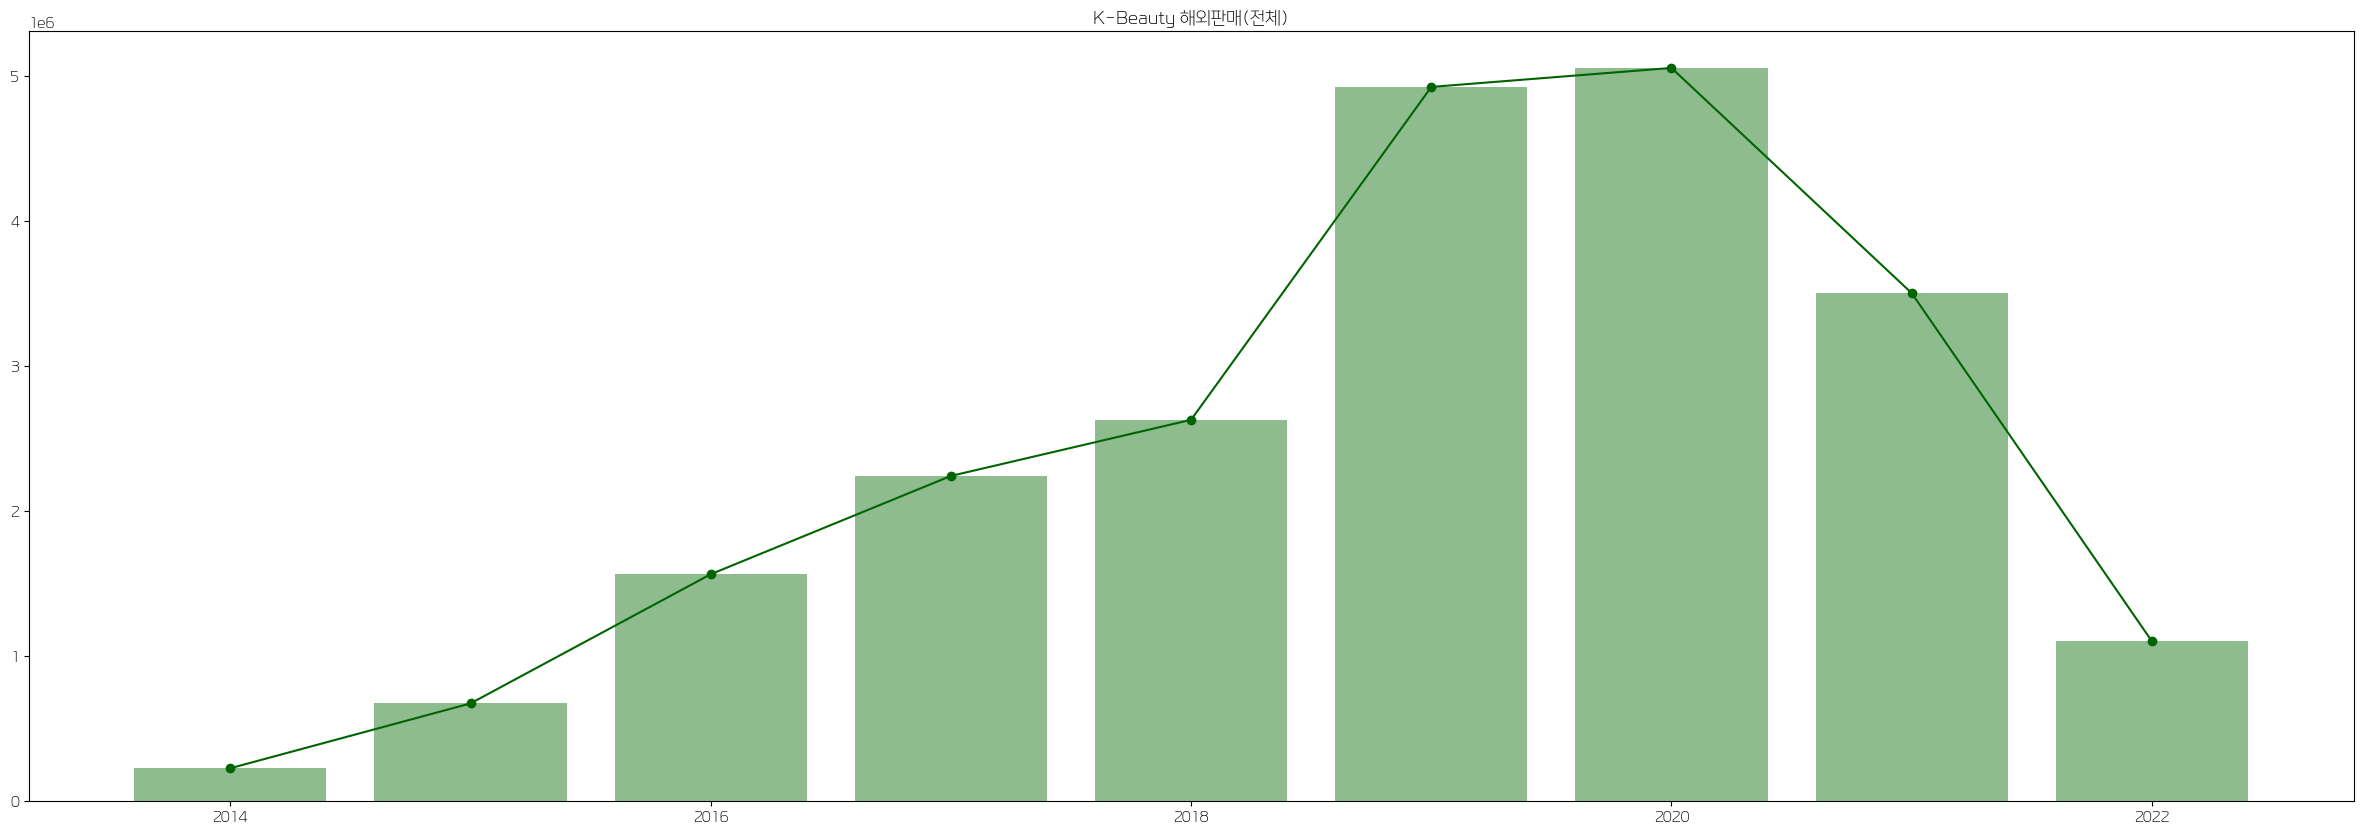

In [24]:
# 연도별 해외 전체 화장품 판매량

fig = plt.figure(figsize=(30,10))
plt.plot(df_yearly['globe_total'],marker='o',color = 'darkgreen')
plt.bar(df_yearly.index,df_yearly['globe_total'],color = 'darkseagreen')
plt.title('K-Beauty 해외판매(전체)')
plt.show()

# 도와주세요: plt 그래프에 value 값 넣기

#### 중국 연도별 화장품 판매량 

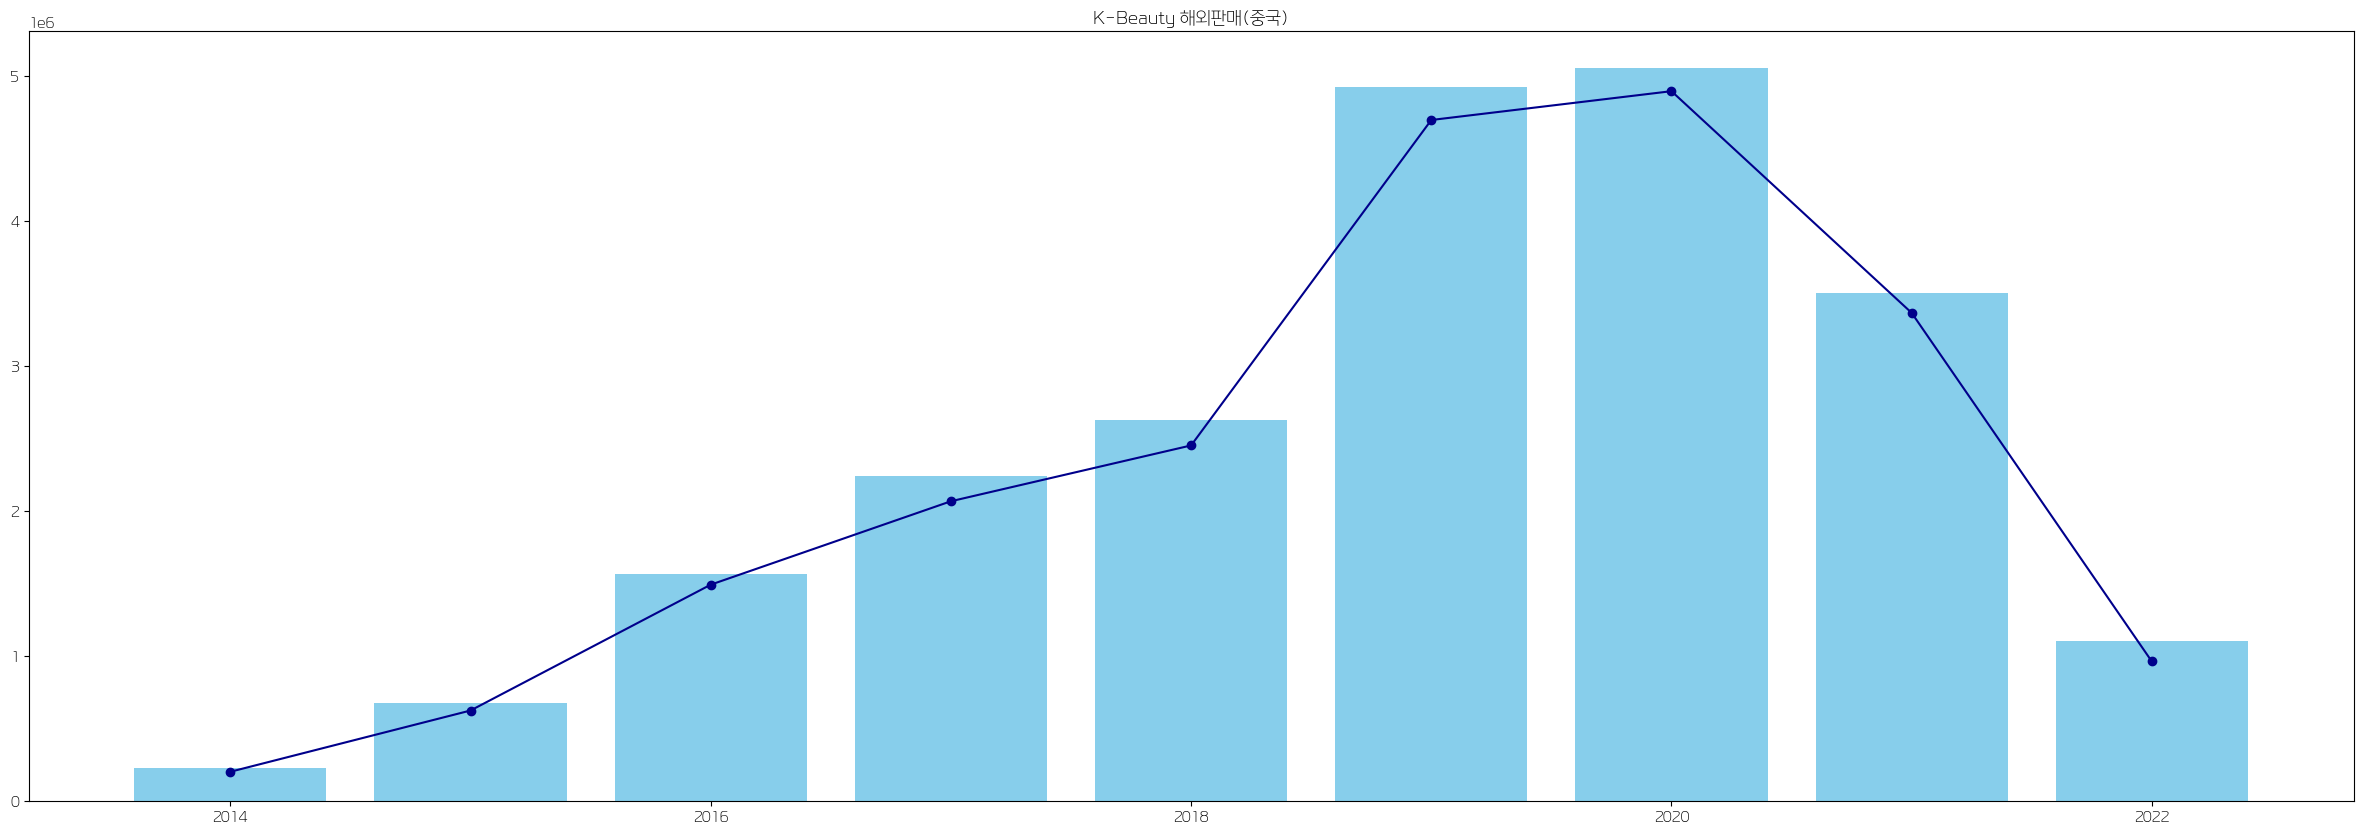

In [25]:
# 연도별 해외판매량 (중국)
fig = plt.figure(figsize=(30,10))
plt.plot(df_yearly['중국'],marker='o',color = 'darkblue')
plt.bar(df_yearly.index,df_yearly['globe_total'],color = 'skyblue')
plt.title('K-Beauty 해외판매(중국)')
plt.show()

# 도와주세요: plt 그래프에 value 값 넣기

#### 중국 제외 국가의 연도별 화장품 판매량 

In [26]:
# 국가 리스트로 뽑기
countries = []

for i in range((len(df_yearly.columns)-2)):
    countries.append(df_yearly.columns[i])
print(len(countries))

8


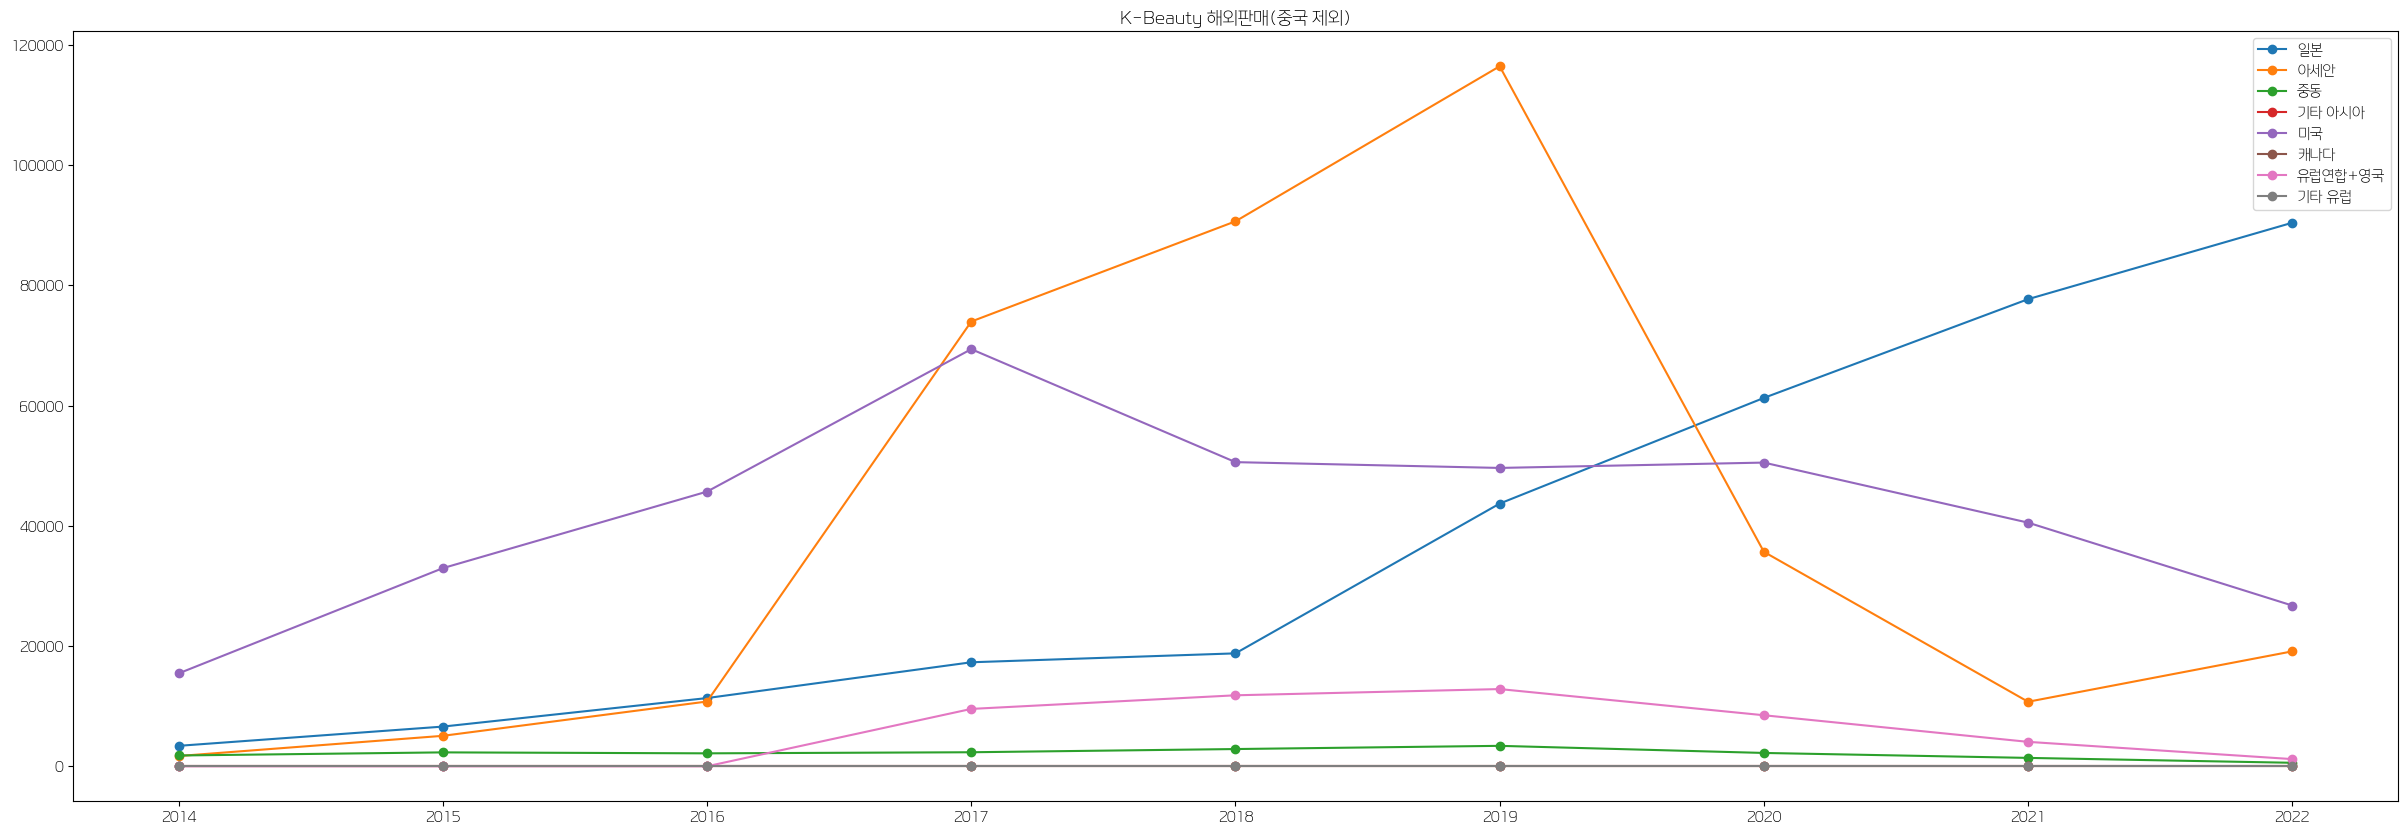

In [27]:
fig = plt.figure(figsize = (30,10))
countries = []
for i in range(9):
    # print(df_yearly.columns[i])
    countries.append(df_yearly.columns[i])



for i in range(1,9):
    country = countries[i]
    # print(countries[i])
    plt.plot(df_yearly[country],marker='o')


plt.title('K-Beauty 해외판매(중국 제외)')
plt.legend(labels = countries[1:])
plt.show()

# 데이터 분석 결과

2017 아세안 화장품 매출 급상승 : 중국 사드보복(2016) 이후 동남아시장 개척을 열심히 함
https://www.yna.co.kr/view/AKR20171222167400030?input=1195m

##